**NL2DS - Winter 2024**

**Assignment 5 -- Language Phylogeny, Clustering**

Name: **Tess Gompper**

Student ID: **260947251**

This homework consists of 38 points.


There are two types of exercise:

* "Problems" require writing code.  
  * Replace `# your code here` with your answer.  
  * The code block should run when all code above it in this file has also been run.  
  * If you skip some problems, it's your responsibility to make sure that all code blocks which you filled out still run.
* "Questions" require writing text.  Replace "**put your answer here**" with your answer.

For "Problems":
* <font color='red'>**You may find code from the course CoLab notebooks useful for this assignment.**</font>  
  *  Every `# Put your answer here` can be solved by a few lines of code, often 1-2 lines.  
  * <font color='red'>**Do not reimplement any major functionality, such as calculating edit distance, linkage methods, etc.**</font>
* Following the contents of these CoLab notebooks, you should:
  * Use `sklearn` functionality as much as possible for machine learning tools. (For example, do not compute clusters in Problem 4 using a different library.)
  * Use `pandas` functionalty as much as possible for basic data manipulation and analysis.
* Do not delete any code, unless it is marked as `# some code to get you started`.

Please make sure to follow directions carefully, including maximum lengths for "Question" answers. Failure to follow directions may result in partial or no credit for the relevant problem/question.


In this assignment, we will look at some cross-linguistic word form data and use some of the tools we saw in class to build family trees of languages based on the sound forms of words---otherwise known as "optimal phylogenies."

We will use data from the following recent paper.


[Dellert, Johannes, Daneyko, T., Muench, A., Ladygina, A., Buch, A., Clarius, N., Grigorjew, I., Balabel, M., Boga, H. I., Baysarova, Z., Muehlenbernd, R., Wahle, J., and Jaeger, G. (2020). Northeuralex: A wide-coverage lexical database of northern eurasia. Language Resources & Evaluation, 54(273–301).](https://drive.google.com/file/d/1ptoMNctdJs99wPWfBUGbw4_X60NtKl9B/view?usp=sharing)

This data  can be found [here](http://northeuralex.org/) as well.

Copy the data to your drive folder from: [here](https://drive.google.com/file/d/1Mfa8XayBFJb0fY8wfinODw90yuRal8AD/view?usp=sharing), [here](https://drive.google.com/file/d/1AQqkscWKlq3quw-BWjB8xqSQzm7-uDtt/view?usp=sharing), and [here](https://drive.google.com/file/d/1R7ZLEzDW9QKUen3BjItPsySaUPCpu7xk/view?usp=sharing).

# **Part 1**

## Question 1 (3 points)

***Question 1:*** Read the paper and/or Northeuralex's website as much as necessary to answer this question.

What is the Northeuralex dataset? Give a brief overview, including:
* What kind of data is it?
* What is the purpose of this data (what sorts of scientific questions or practical applications will it be used to address)?
* How was it constructed?

 Your answer should not refer to low-level details, such as file names or what columns are present in different files.  Just give an overview of no more than one paragraph that gives the gist for someone unfamiliar with the dataset.

**A1: The Northeuralex dataset is a lexicostatistical database of Northern Eurasia. This dataset covers 1016 concepts across 107 languages, with a focus on Northern Eurasia. The dataset is likely to be used for computational studies in historical linguistics. The dataset was constructed wiht an automatic transcription system based, for the most part, on phonological
descriptions for the languages**

## Question 2 (3 points)

Now, let's read in the wordforms in this dataset.

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

import pandas as pd
wordforms=pd.read_csv("/content/drive/My Drive/northeuralex.csv")
display(wordforms)

Mounted at /content/drive/


,Language_ID,Glottocode,Concept_ID,Word_Form,rawIPA,IPA,ASJP,List,Dolgo,Next_Step
0,fin,finn1318,Auge::N,silmä,silmæ,s i l m æ,silmE,SILME,SVRMV,validate
1,fin,finn1318,Ohr::N,korva,kɔrʋɑ,k ɔ r ʋ ɑ,korwa,KURWA,KVRWV,validate
2,fin,finn1318,Nase::N,nenä,nɛnæ,n ɛ n æ,nEnE,NENE,NVNV,validate
3,fin,finn1318,Mund::N,suu,suː,s u u,su,SY,SV,validate
4,fin,finn1318,Zahn::N,hammas,hɑmːɑs,h ɑ m m ɑ s,hamas,HAMAS,HVMVS,validate
...,...,...,...,...,...,...,...,...,...,...
121608,cmn,mand1415,verkaufen::V,卖,mâɪ̯,m a ɪ,mai,MAI,MV,validate
121609,cmn,mand1415,bezahlen::V,付钱,fû t͡ɕʰjɛ̌n,f u _ t͡ɕ ʰ j ɛ n,fuCyEn,BY_CJE2N,PV_KJV1N,validate
121610,cmn,mand1415,zahlen::V,支付,t͡ʂɨ˦fû,t ʂ ɨ f u,C3fu,CI1BY,KV1PV,validate
121611,cmn,mand1415,beherrschen::V,统治,tʰʊ̂̌ŋt͡ʂɨ̂,tʰ ʊ ŋ t ʂ ɨ,tuNC3,TY2NCI,TV1NKV,validate


***Question 2:*** Describe the meaning of the `Language_ID`, `Concept_ID`, `rawIPA` and `IPA` columns of the data.  Why are there separate `rawIPA` and `IPA` columns?

**A2: `Language_ID` is the id code for the language, eg Finnish = "fin". `Concept_ID` is the word for the given row in German, and the word's part of speech. `rawIPA` is the word encoded in the International Phonetic Alphabet (IPA). `IPA` is the IPA in a tokenized format, with each letter spaced out. There are likely separate `rawIPA` and `IPA` columns so that users can use and manipulate the IPA column in an easier manner.**

## Question 3 (2 points)

Now let's read in some metadata about the languages.

In [3]:
languages=pd.read_csv("/content/drive/My Drive/northeuralex-languages.csv")
display(languages)

,name,glotto_code,iso_code,family,subfamily,latitude,longitude
0,Finnish,finn1318,fin,Uralic,Finnic,61.0000,24.4500
1,North Karelian,kare1335,krl,Uralic,Finnic,65.1691,30.8655
2,Olonets Karelian,livv1243,olo,Uralic,Finnic,61.0000,33.0000
3,Veps,veps1250,vep,Uralic,Finnic,60.3353,34.7865
4,Estonian,esto1258,ekk,Uralic,Finnic,59.2500,24.7500
...,...,...,...,...,...,...,...
102,Dargwa,darg1241,dar,Nakh-Daghestanian,Daghestanian,42.4257,47.4388
103,Chechen,chec1245,che,Nakh-Daghestanian,Nakh,43.5000,45.5000
104,Standard Arabic,stan1318,arb,Afro-Asiatic,Semitic,27.9625,43.8525
105,Modern Hebrew,hebr1245,heb,Afro-Asiatic,Semitic,31.1056,35.0179


***Question 3:*** Describe the meaning of the `family`, `iso_code`, and `subfamily` columns of the data.  

**A3: `family` is the high-level language family that the given language belongs to. `iso_code` is the id for the particualr language, it is similar to `Language_ID` in the dataset in Question 2. `subfamily` is the family wirthin the top level language family that the language belongs to.**

## Question 4 (2 points)

Now let's read in some further data about the concepts.

In [4]:
concepts=pd.read_csv("/content/drive/My Drive/northeuralex-concepts.csv")
display(concepts)

,number,position_in_ranking,ranking_value,id_nelex,gloss_en,gloss_ru,annotation_en,annotation_en.1,annotation_ru,concepticon,concepticon_id,concepticon_proposed,comments
0,1,44,"-2,539237",Auge::N,eye,глаз,[[Anatomie]],[[anatomy]],[[анатомия]],EYE,1248,EYE,NaN
1,2,34,"-2,649194",Ohr::N,ear,ухо,[[Anatomie]],[[anatomy]],[[анатомия]],EAR,1247,EAR,NaN
2,3,149,"-1,995463",Nase::N,nose,нос,[[Anatomie]],[[anatomy]],[[анатомия]],NOSE,1221,NOSE,NaN
3,4,25,"-2,762589",Mund::N,mouth,рот,[[Anatomie]],[[anatomy]],[[анатомия]],MOUTH,674,MOUTH,NaN
4,5,31,"-2,670705",Zahn::N,tooth,зуб,[BSP:menschlicher Schneidezahn],[EX:human incisor],[НАПР:человека],TOOTH,1380,TOOTH,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1011,1012,140,"-2,029052",verkaufen::V,sell,продать,[BSP:Ware],[EX:goods],[НАПР:товар],SELL,1571,SELL,NaN
1012,1013,198,"-1,822012",bezahlen::V,pay for,заплатить,[BSP:Ware],[EX:goods],[НАПР:за товар],NaN,0,PAY_FOR,NaN
1013,1014,235,"-1,715766",zahlen::V,pay,платить,[BSP:im Restaurant],[EX:in a restaurant],[НАПР:в ресторане],PAY,718,PAY,NaN
1014,1015,899,"0,118183",beherrschen::V,rule,владеть,[BSP:Land],[EX:country],[НАПР:страной],RULE,1846,RULE,NaN


***Question 4:*** Describe the meaning of the `id_nelex`, `gloss_en`, and `position_in_ranking` columns of the data.

**A4: `id_nelex` is the word for the given row in German, and the word's part of speech, it is similar to `Concept_ID` in question 2. `gloss_en` is the word in English. `position_in_ranking` is the words ranking against the other words by basicness score.**

# **Part 2**

## Problem 1 (2 points)

It will be useful to merge all of the meta-information into the main wordforms dataframe.

In [11]:
# Problem 1a: rename the appropriate columns in the languages and concepts dataframes to make this merge possible.
# your code here
# wordforms languages concepts
# iso_code in languages matches Language_ID in wordforms
languages = languages.rename(columns={'iso_code': 'Language_ID'})
# id_nelex in concepts matches Concept_ID in wordforms
concepts = concepts.rename(columns={'id_nelex': 'Concept_ID'})

# Problem 1b: Use the merge function to merge the three dataframes into one.
# your code here
wordforms = wordforms.merge(languages, on='Language_ID', how='outer')

wordforms = wordforms.merge(concepts, on='Concept_ID', how='outer')

display(wordforms)

,Language_ID,Glottocode,Concept_ID,Word_Form,rawIPA,IPA,ASJP,List,Dolgo,Next_Step,...,ranking_value,gloss_en,gloss_ru,annotation_en,annotation_en.1,annotation_ru,concepticon,concepticon_id,concepticon_proposed,comments
0,fin,finn1318,Auge::N,silmä,silmæ,s i l m æ,silmE,SILME,SVRMV,validate,...,"-2,539237",eye,глаз,[[Anatomie]],[[anatomy]],[[анатомия]],EYE,1248,EYE,NaN
1,krl,kare1335,Auge::N,silmä,silmæ,s i l m æ,silmE,SILME,SVRMV,validate,...,"-2,539237",eye,глаз,[[Anatomie]],[[anatomy]],[[анатомия]],EYE,1248,EYE,NaN
2,olo,livv1243,Auge::N,silmy,silmʏ,s i l m ʏ,silmi,SILMY,SVRMV,validate,...,"-2,539237",eye,глаз,[[Anatomie]],[[anatomy]],[[анатомия]],EYE,1248,EYE,NaN
3,vep,veps1250,Auge::N,sil'm,silʲm,s i lʲ m,silm,SILM,SVRM,validate,...,"-2,539237",eye,глаз,[[Anatomie]],[[anatomy]],[[анатомия]],EYE,1248,EYE,NaN
4,ekk,esto1258,Auge::N,silm,sʲilm,sʲ i l m,silm,SILM,SVRM,validate,...,"-2,539237",eye,глаз,[[Anatomie]],[[anatomy]],[[анатомия]],EYE,1248,EYE,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121608,heb,hebr1245,ertragen::V,סבל,saval,s a v a l,saval,SABAL,SVWVR,validate,...,"-0,491453",endure,вытерпеть,[BSP:Schmerz],[EX:pain],"[выдержать, НАПР:боль]",ENDURE,833,ENDURE,NaN
121609,cmn,mand1415,ertragen::V,忍耐,ɻə̂̌nnâɪ̯,ɻ ə n n a ɪ,L3nai,RE2NNAI,RV1NNV,validate,...,"-0,491453",endure,вытерпеть,[BSP:Schmerz],[EX:pain],"[выдержать, НАПР:боль]",ENDURE,833,ENDURE,NaN
121610,bua,buri1258,ertragen::V,тэсэхэ,tɛsɛxɛ,t ɛ s ɛ x ɛ,tEsExE,TESEGE,TVSVKV,validate,...,"-0,491453",endure,вытерпеть,[BSP:Schmerz],[EX:pain],"[выдержать, НАПР:боль]",ENDURE,833,ENDURE,NaN
121611,bua,buri1258,ertragen::V,тэсэжэ гараха,tɛsɛʒɛ ɡaraxa,t ɛ s ɛ ʒ ɛ _ ɡ a r a x a,tEsEZEgaraxa,TESESE_KARAGA,TVSVSV_KVRVKV,validate,...,"-0,491453",endure,вытерпеть,[BSP:Schmerz],[EX:pain],"[выдержать, НАПР:боль]",ENDURE,833,ENDURE,NaN


## Problem 2 (2 points)

In this problem set, we will make use of the `lingpy` package of tools for historical linguistics. You can find more information on this [here](ttps://lingpy.org/index.html). We'll start by installing the package.

In [ ]:
!pip install lingpy

In order to make our computations below more manageable, we will focus on the Indo-european languages which you can read more about [here](https://en.wikipedia.org/wiki/Indo-European_languages). We will also focus just on the top 20 concepts as determined by their rank.

In [12]:
#Problem 2a: Filter out the non-Indo-European languages from the dataframes
family = 'Indo-European'
wordforms = wordforms[wordforms['family']==family]

#Problem 2b: Filter the concepts to include those less than or equal to rank 20 in the dataframe.
wordforms75 = wordforms[wordforms['position_in_ranking'] <= 75]
wordforms = wordforms[wordforms['position_in_ranking'] <= 20]

display(wordforms)

,Language_ID,Glottocode,Concept_ID,Word_Form,rawIPA,IPA,ASJP,List,Dolgo,Next_Step,...,ranking_value,gloss_en,gloss_ru,annotation_en,annotation_en.1,annotation_ru,concepticon,concepticon_id,concepticon_proposed,comments
7163,ben,beng1280,Wasser::N,জল,d͡ʒɔl,d͡ʒ ɔ l,jol,CUL,KVR,validate,...,"-2,92383",water,вода,[kaltes Wasser],[cold water],[холодная вода],WATER,948,WATER,NaN
7164,hin,hind1269,Wasser::N,जल,d͡ʒəl,d͡ʒ ə l,j3l,CEL,KVR,validate,...,"-2,92383",water,вода,[kaltes Wasser],[cold water],[холодная вода],WATER,948,WATER,NaN
7165,hin,hind1269,Wasser::N,पानी,paːniː,p a a n i i,pani,PANI,PVNV,validate,...,"-2,92383",water,вода,[kaltes Wasser],[cold water],[холодная вода],WATER,948,WATER,NaN
7166,pbu,nort2646,Wasser::N,اوبه,oˈbə,o b ə,ob3,UPE,VPV,validate,...,"-2,92383",water,вода,[kaltes Wasser],[cold water],[холодная вода],WATER,948,WATER,NaN
7167,pes,west2369,Wasser::N,آب,ɒːb,ɒ ɒ b,ob,OP,VP,validate,...,"-2,92383",water,вода,[kaltes Wasser],[cold water],[холодная вода],WATER,948,WATER,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107539,cat,stan1289,geben::V,donar,d̪una,d u n a,duna,TYNA,TVNV,validate,...,"-3,482883",give,дать,"[allgemein, BSP:Gegenstand]",[],[],GIVE,1447,GIVE,NaN
107540,spa,stan1288,geben::V,dar,daɾ,d a ɾ,dar,TAR,TVR,validate,...,"-3,482883",give,дать,"[allgemein, BSP:Gegenstand]",[],[],GIVE,1447,GIVE,NaN
107541,por,port1283,geben::V,dar,dar,d a r,dar,TAR,TVR,validate,...,"-3,482883",give,дать,"[allgemein, BSP:Gegenstand]",[],[],GIVE,1447,GIVE,NaN
107542,ita,ital1282,geben::V,dare,dare,d a r e,dare,TARE,TVRV,validate,...,"-3,482883",give,дать,"[allgemein, BSP:Gegenstand]",[],[],GIVE,1447,GIVE,NaN


# **Part 3**

## Problem 3 (6 points)

Our goal is to use agglomerative clustering to try to reconstruct the tree for the indoeuropean languages. You can find a reference tree (for families) [here](https://en.wikipedia.org/wiki/Indo-European_languages#/media/File:IndoEuropeanLanguageFamilyRelationsChart.jpg).

In order to do this, we will need to construct a  matrix of similarities between the languages, called a confusion matrix.

We will compute the (normalized) levenshtein distance between the strings for each concept for each pair of languages. For instance, we will compute the normalized levenshtein distance between the words for Wasser::N (water in English) for German and English and then similarily for all 19 other concepts. If there are multiple words for the same concept, take the average across all pair possibilities. We will then average these values (i.e., average across all concepts) to find the similarity between German and English. We will do this for all pairs of languages to create a list of lists representing the confusion matrix.

Note that running your code will take a few minutes.

**Hint**: Make use of the `lp.align.pairwise.edit_dist` function from lingpy.

In [ ]:
import lingpy as lp
from lingpy.align.pairwise import edit_dist
import numpy as np

#Problem 3: fill the confusion matrix on
#the "IPA" fields for each language.

#initialize confusion matrix
language_list = wordforms['Language_ID'].unique().tolist() # Initialise list of languages in the current modified wordforms dataset
confusion = [[0 for j in range(len(language_list))] for i in range(len(language_list))]

concept_list = wordforms['Concept_ID'].unique().tolist()

# your code here; some code to get you started:
for i, language1 in enumerate(language_list):
  for j, language2 in enumerate(language_list):
    distances = []
    for concept in concept_list:
      words1 = wordforms[(wordforms['Language_ID'] == language1) & (wordforms['Concept_ID'] == concept)]['IPA'].tolist()
      words2 = wordforms[(wordforms['Language_ID'] == language2) & (wordforms['Concept_ID'] == concept)]['IPA'].tolist()
      concept_distances = [edit_dist(w1, w2, normalized=True) for w2 in words2 for w1 in words1]
      avg_distance = np.mean(concept_distances) if concept_distances else 0
      distances.append(avg_distance)
    avg_lang_distance = np.sum(distances)
    confusion[i][j] = avg_lang_distance/len(concept_list)


**After running it, clear the *output* of the above cell (by clicking on the cross at top left of the output part) so that it doesn't clutter the pdf.**

## Question 5 (2 points)

Now that we have computed a matrix of similarities, we can use clustering algorithms to try to build phylogenetic trees representing the languages historical relationships. First, let's use the `lp.algorithm.clustering.flat_cluster` function from `lingpy` to derive a flat clustering of languages.


In [14]:
lp.algorithm.clustering.flat_cluster('upgma', 0.6, confusion, language_list)

{0: ['ben', 'hin'],
 2: ['pbu'],
 3: ['pes', 'kmr'],
 5: ['oss'],
 6: ['hye'],
 7: ['ell'],
 8: ['sqi'],
 10: ['hrv',
  'slv',
  'bul',
  'slk',
  'pol',
  'ces',
  'bel',
  'rus',
  'ukr',
  'lit',
  'lav'],
 20: ['isl', 'nor', 'swe', 'dan', 'deu', 'nld', 'eng'],
 27: ['gle'],
 28: ['cym', 'bre'],
 30: ['lat'],
 31: ['fra'],
 32: ['cat', 'spa', 'por', 'ita', 'ron']}

***Question 5:*** Do you recognize any of the clusters of languages? Are there any noteworthy errors in this clustering?  (You may first need to learn a bit about Indo-European languages.)

**A5: The Germanic languages are clustred together (20) and the Balto-Slavic languages are clustered (19). Some Indo-Iranian languages are found in clusters however others are alone. Similarly, Catalan, Spanish, Portuguese, Italian, and Romanian are clustered, these are Italic languages, however the cluster is missing French and Latin which are in their ownindicidual clusters and Welsh (cym) and Breton, Celtic lnaguages, are clustered, but are missing Irish (gle).**

In [15]:
labels20 = lp.algorithm.clustering.flat_cluster('upgma', 0.6, confusion, language_list)

## **Part 4**

## Problem 4 (2 points)

Now we will build our own dendrogram using the clustering algorithms available in [`scipy`](https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html). You can read in particular about the [`linkage`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html) function and the [`dendrogram`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html) function.

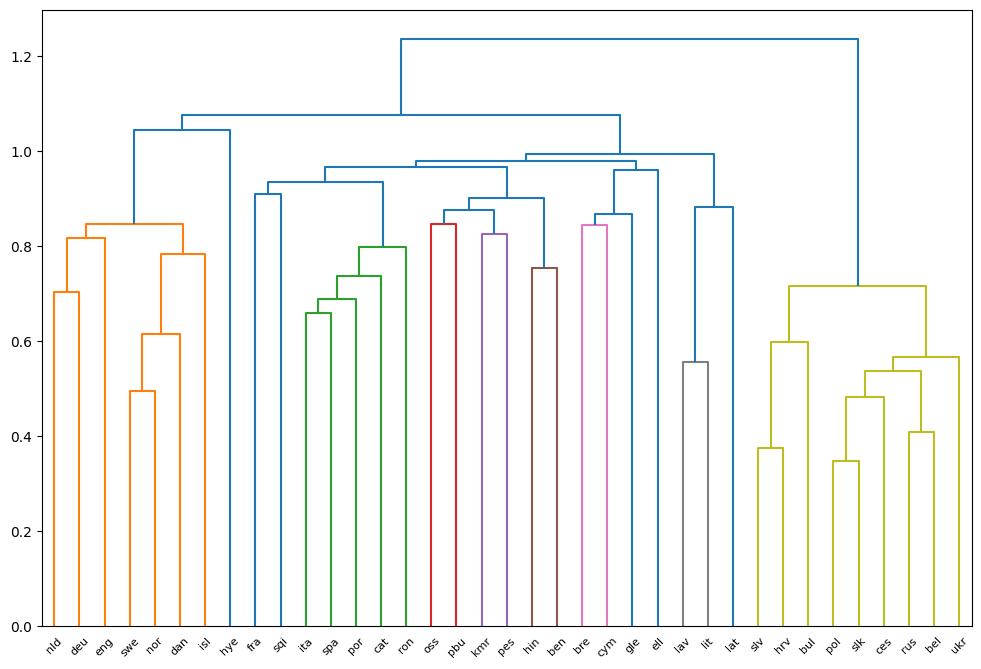

In [16]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import v_measure_score
import matplotlib.pyplot as plt

#Problem 4: use the linkage function with the average linkage method to compute the clustering.

# your code here; some code to get you started:
linked = linkage(confusion, method="average")



#plot the results using dendrogram
def llf(id): return language_list[id]
plt.figure(figsize=(12, 8))
dendrogram(linked,
           p=100,
           truncate_mode="level",
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=False,
           leaf_label_func=llf)

plt.show()

## Question 6 (2 points)

***Question 6:*** Do you recognize any of the clusters of languages at any of the levels? Are there any noteworthy errors in this clustering?

**A6: I recognize the Germanic languages (orange), the Balto-Slavic languages (yellow-green) however Lithuanian and Latvian are not correctly clustred with them, the majority of the Italic languages are clustered (green), however Latin seems a little too far away.**

# **Part 5**

## Problem 5 / Question 7 (4 points)
(4 points: 2 points for code, 2 points for answer)

***Question 7:*** Try two of the other linkage methods and describe how they change the results.

**A7: The Ward method created a much smaller number of clusters, almost all of the Balto-Slavic languages remain in their owncluster. Complete linkage created fewer and more distinct clusters than average clustering, we can still pretty clearly see the Italic, celtic, germanic, and balto-slavic clusters, which are close to correct.**

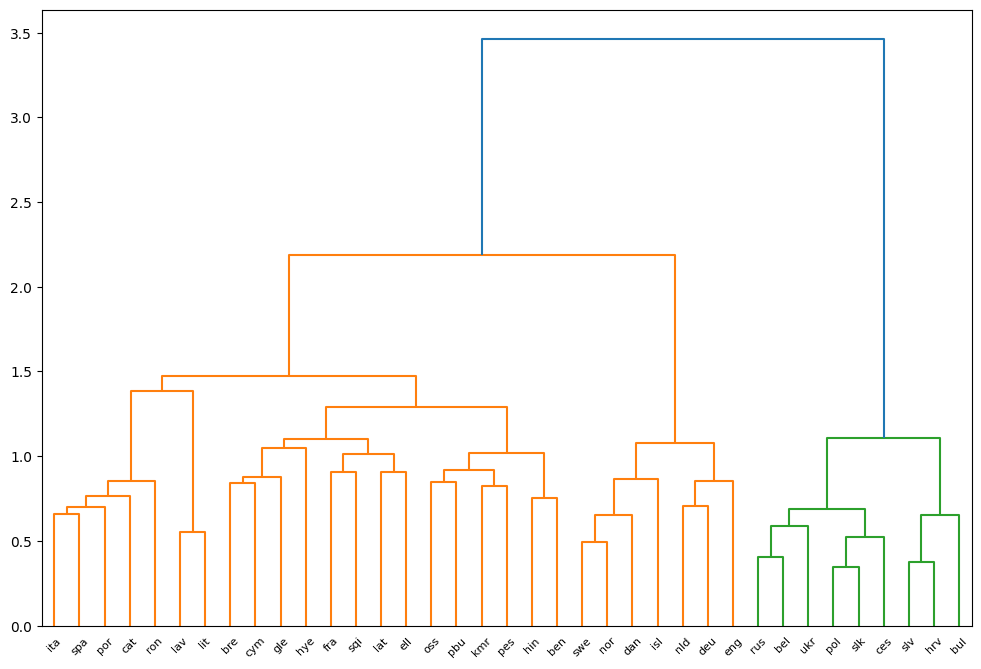

In [17]:
linked = linkage(confusion, method="ward")

def llf(id): return language_list[id]
plt.figure(figsize=(12, 8))
dendrogram(linked,
           p=100,
           truncate_mode="level",
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=False,
           leaf_label_func=llf)

plt.show()

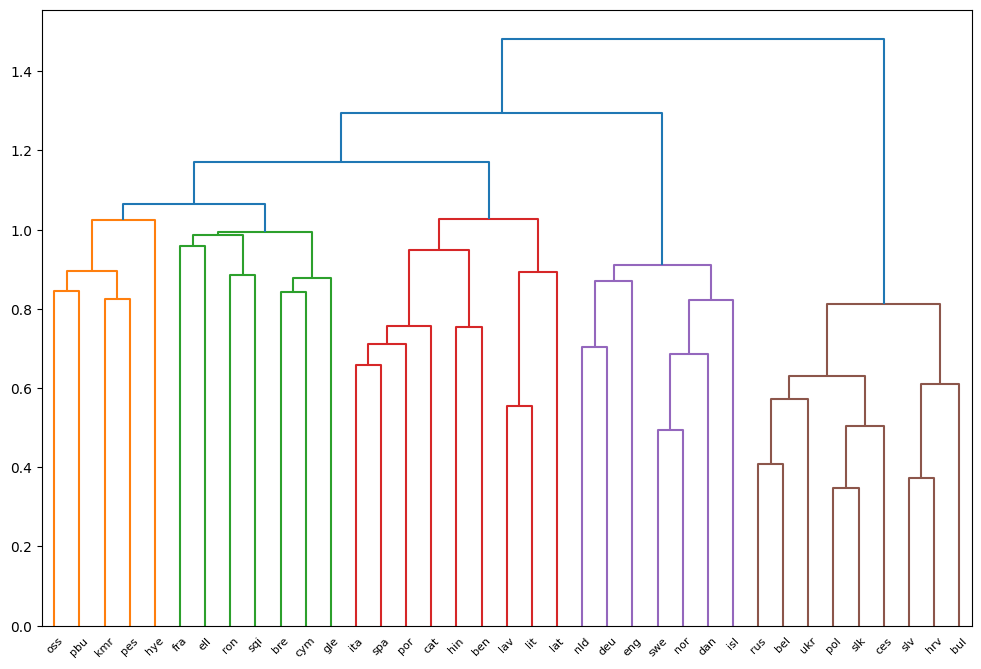

In [18]:
linked = linkage(confusion, method="complete")

def llf(id): return language_list[id]
plt.figure(figsize=(12, 8))
dendrogram(linked,
           p=100,
           truncate_mode="level",
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=False,
           leaf_label_func=llf)

plt.show()

## Problem 6 / Question 8 (4 points)
(4 points: 2 points for code, 2 points for answer)



***Question 8:*** Try increasing the number of concepts we use to compute our confusion matrix to be higher than 20. Does it change the results?

**A8: Using 75 concepts instead of 20 gives the same results as in problem 4**

<ipython-input-19-ed933346b62b>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  words1 = wordforms[(wordforms75['Language_ID'] == language1) & (wordforms75['Concept_ID'] == concept)]['IPA'].tolist()
<ipython-input-19-ed933346b62b>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  words2 = wordforms[(wordforms75['Language_ID'] == language2) & (wordforms75['Concept_ID'] == concept)]['IPA'].tolist()


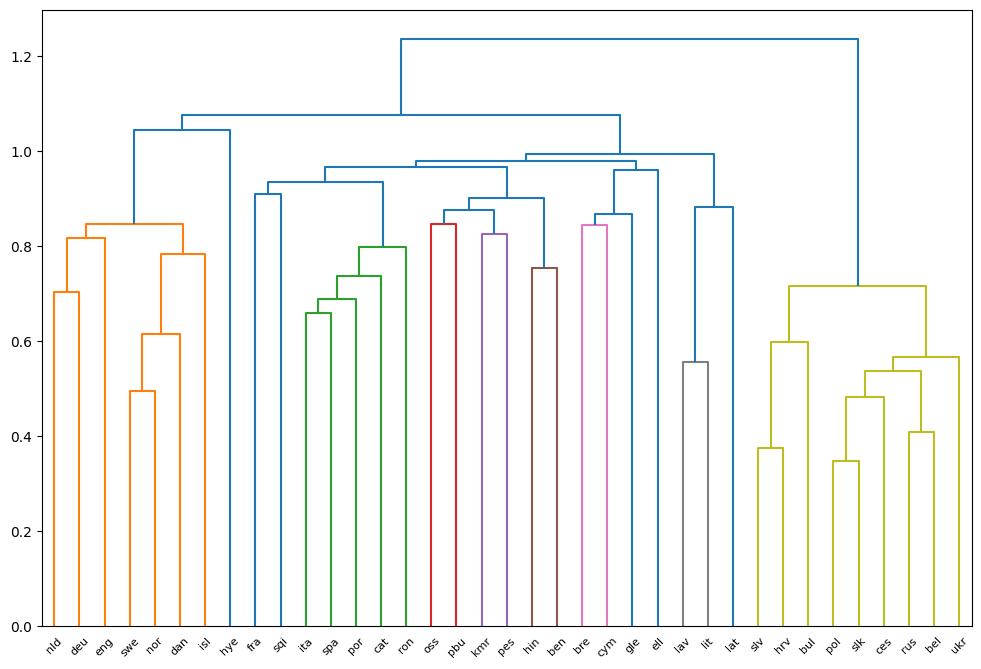

In [19]:

language_list = wordforms75['Language_ID'].unique().tolist() # Initialise list of languages in the current modified wordforms dataset
confusion = [[0 for j in range(len(language_list))] for i in range(len(language_list))]

concept_list_75 = wordforms75['Concept_ID'].unique().tolist()

# your code here; some code to get you started:
for i, language1 in enumerate(language_list):
  for j, language2 in enumerate(language_list):
    distances = []
    for concept in concept_list_75:
      words1 = wordforms[(wordforms75['Language_ID'] == language1) & (wordforms75['Concept_ID'] == concept)]['IPA'].tolist()
      words2 = wordforms[(wordforms75['Language_ID'] == language2) & (wordforms75['Concept_ID'] == concept)]['IPA'].tolist()
      concept_distances = [edit_dist(w1, w2, normalized=True) for w2 in words2 for w1 in words1]
      avg_distance = np.mean(concept_distances) if concept_distances else 0
      distances.append(avg_distance)
    avg_lang_distance = np.sum(distances)
    confusion[i][j] = avg_lang_distance/len(concept_list)
lp.algorithm.clustering.flat_cluster('upgma', 0.6, confusion, language_list)
linked = linkage(confusion, method="average")



#plot the results using dendrogram
def llf(id): return language_list[id]
plt.figure(figsize=(12, 8))
dendrogram(linked,
           p=100,
           truncate_mode="level",
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=False,
           leaf_label_func=llf)

plt.show()

# Part 6

Let's evaluate the quality of the clustering from Question 5, relative to the two class labels we have: `family` and `subfamily`.

## Problem 7 (4 points)

Write code to compute the V measure scores for this clustering relative to `family` and `subfamily`, then print them.

In [39]:
## Problem 7

## your code here
## save the two V measure scores as v_measure_family and v_measure_subfamily

# we only looked at indo-european family
true_family = [1, 1, 1, 1, 1, 1,
               1, 1, 1, 1, 1, 1,
               1, 1, 1, 1, 1, 1,
               1, 1, 1, 1, 1, 1,
               1, 1, 1, 1, 1, 1,
               1, 1, 1, 1, 1, 1,
               1]
clustered_family = [1, 1, 1, 1, 1, 1,
                    1, 1, 1, 1, 1, 1,
                    1, 1, 1, 1, 1, 1,
                    1, 1, 1, 1, 1, 1,
                    1, 1, 1, 1, 1, 1,
                    1, 1, 1, 1, 1, 1,
                    1]
v_measure_family = v_measure_score(true_family, clustered_family)

true_subfamily = [1, 1, 1, 1, 1, 1,
                  2, 3, 4, 5, 5, 5,
                  5, 5, 5, 5, 5, 5,
                  5, 5, 6, 6, 6, 6,
                  6, 6, 6, 7, 7, 7,
                  8, 8, 8, 8, 8, 8,
                  8]
clustered_subfamily = [1, 1, 2, 3, 3, 4,
                       5, 6, 7, 8, 8, 8,
                       8, 8, 8, 8, 8, 8,
                       8, 8, 9, 9, 9, 9,
                       9, 9, 9, 10, 11, 11,
                       12, 13, 14, 14, 14, 14,
                       14]
v_measure_subfamily = v_measure_score(true_subfamily, clustered_subfamily)

print("V Measure realtive to family:")
print(v_measure_family)
print("V Measure realtive to subfamily:")
print(v_measure_subfamily)


V Measure realtive to family:
1.0
V Measure realtive to subfamily:
0.895059463272662


# To Submit
To submit:
* Name this notebook `YOUR_STUDENT_ID_Assignment_5.ipynb` and download it.
* Convert this `.ipynb` file to a `.pdf` (e.g., using the following instructions).  
* Upload the PDF to the Gradescope assignment "Assignment 5".  
* Submit the `.ipynb` file on myCourses under Assignment 5.

(Note: `Print > Save as PDF` **will not work** because it will not display your figures correctly.)

You can convert the notebook to a PDF using the following instructions.

# Converting this notebook to a PDF

1. Make sure you have renamed the notebook, e.g. `000000000_Assignment_5.ipynb` where `000000000` is your student ID.
2. Make sure to save the notebook (`ctrl/cmd + s`).

Make sure Google Drive is mounted (it likely already is from the first question).

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
!ls "/content/drive/My Drive/Colab Notebooks/"

3. Install packages for converting .ipynb to .pdf

In [ ]:
!apt-get -q install texlive-xetex texlive-fonts-recommended texlive-plain-generic

4. Convert to PDF (replace `000000000` with your student ID)

In [ ]:
%env STUDENT_ID=000000000
!jupyter nbconvert --to pdf "/content/drive/My Drive/Colab Notebooks/${STUDENT_ID}_Assignment_5.ipynb"

5. Download the resulting PDF file. If you are using Chrome, you can do so by running the following code. On other browsers, you can download the PDF using the file mananger on the left of the screen (Navigate to the file > Right Click > Download).

In [ ]:
import os
from google.colab import files
files.download(f"/content/drive/My Drive/Colab Notebooks/{os.environ['STUDENT_ID']}_Assignment_5.pdf")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

6. Verify that your PDF correctly displays your figures and responses.